<a href="https://colab.research.google.com/github/nedokormysh/GB_PyTorch/blob/lesson8/GB_PyTorch_hw_8_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание
Обучить генератор создавать точки, которые будут лежать на графике функции 
 $$y = \frac{sin(x)}{x} - \frac{x}{10}$$
При выполнении данного задания структура GAN остается той же, но Вам нужно:
- Сгенерировать настоящие данные
- Изменить архитектуру дискриминатора и генератора
- Построить графики

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
import torch
import torch.nn as nn
from IPython import display

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Построим график функции.

In [33]:
x = np.linspace(-50, 50, 1000)
y = (np.sin(x) / x) - (x / 10)
# plt.figure(figsize=(8, 6))
# plt.plot(x, y)
# plt.title('График зависимости у от значений x')
# plt.grid()

In [ ]:
# n_epochs = 20  # количество эпох
# lr = 0.0002  # шаг обучения

# b1 = 0.5  # гиперпараметр для оптимайзера Adam
# b2 = 0.999  # гиперпараметр для оптимайзера Adam

# batch_size = 128
# latent_dim = 1000  # Размерность случайного вектора, который подается на вход генератору

# sample_interval = 500  # количество итераций для отображения процесса обучения

Создадим датасет.

In [34]:
batch_size = 128

class FunctionDataWrap(torch.utils.data.Dataset):
    def __init__(self, x, y, train=True):
          self.data = x
          self.values = y

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.values[index]


dataset = FunctionDataWrap(x, y)
# print(x.shape)

dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=batch_size, 
                                         shuffle=True,
                                         num_workers=2)

0 torch.Size([50]) torch.Size([50])


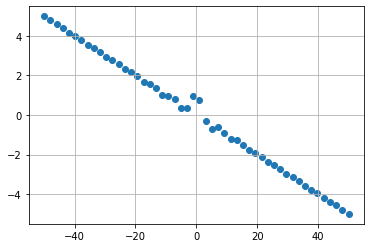

In [29]:
for i, (x_val, y_val) in enumerate(dataloader):
  print(i
        , x_val.shape, y_val.shape
        )
  
# x_val = x_val.numpy()
# y_val = y_val.numpy()

plt.scatter(x_val, y_val)
plt.grid()

# x_val, y_val

In [ ]:
# ep = []
# for i in range(10):
#   ep.append(i*sample_interval)
# ep

In [5]:
x_val

tensor([-20.5706,  -1.8519, -48.2983,  24.0741, -15.4655, -18.9690,  15.5656,
        -16.3664, -34.8849,  44.7948,  39.7898,  48.2983,  19.8699,  33.2833,
        -30.1802,  20.9710,  38.9890,  30.6807,  -3.7538, -31.5816, -45.7958,
         32.1822, -18.5686,  12.5626, -20.0701, -19.7698, -46.9970,  25.1752,
         -4.7548, -29.5796, -10.0601, -44.5946,  31.1812, -48.8989,   1.0511,
         35.8859, -16.1662,  -6.5566, -28.6787,  39.4895,  27.8779,  14.5646,
          8.6587, -11.4615, -25.8759,  -1.3514, -12.2623,   6.7568, -36.4865,
         18.4685, -44.3944,  -1.4515, -26.1762,  -4.3544,   1.8519,  -0.1502,
         42.9930,  37.7878, -20.6707,  17.4675,  36.2863,   9.3594,   5.8559,
        -46.4965, -12.5626,  -7.2573,  -5.4555, -21.5716,  46.6967,  17.9680,
         -9.6597, -38.0881,  -0.0501,  35.1852,  11.0611, -40.0901, -22.5726,
         -3.1532,   1.2513,  -5.2553,  44.4945,  27.3774, -18.4685,  43.9940,
          4.3544, -45.3954,  33.0831,  24.8749,  12.9630,  49.29

In [ ]:
# x_val, y_val = dataloader

## Класс генератора.

In [18]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Использование таких словарей позволяет нам варьировать параметры нашей сети в процессе использования
        self.activations = nn.ModuleDict([
            ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
            ['relu', nn.ReLU()]
        ])
        
        def block(in_feat, out_feat, normalize=True, activation='relu'):
            layers = [nn.Linear(in_feat, out_feat)]  # Если мы создаем последовательность слоев - то мы задаем их
                                                     # с помощью списка.
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat))

            layers.append(self.activations[activation])  # Эта строчка означает тоже самое что и layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),  # Звездочка означает unpacking списка  
            *block(128, 256, activation='lrelu'),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, 2)
        )
        self.double()
        
    def forward(self, z):
        num = self.model(z)
        # print(num)
        return num

In [ ]:
# z

In [ ]:
# class Generator(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.activations = nn.ModuleDict([
#             ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
#             ['relu', nn.ReLU()]
#         ])
        
#         def block(in_feat, out_feat, normalize=True, activation='relu'):
#             layers = [nn.Linear(in_feat, out_feat)]  
            
#             if normalize:
#                 layers.append(nn.BatchNorm1d(out_feat))

#             layers.append(self.activations[activation])
#             return layers

#         self.model = nn.Sequential(
#             *block(latent_dim, 128, normalize=False),
#             *block(128, 256, activation='lrelu'),
#             *block(256, 512, activation='lrelu'),
#             *block(512, 1024),
#             nn.Linear(1024, 2),
#         )
#         self.double()

#     def forward(self, z):
#         pred = self.model(z)
        # return pred

In [ ]:
# generator = Generator().to(device)
# gen_xy = generator(z)

## Дискриминатор

### Встроенный линейный слой



In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.activations = nn.ModuleDict([
            ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
            ['relu', nn.ReLU()],
            ['sigmoid', nn.Sigmoid()],
        ])

        def block(in_feat, out_feat, normalize=False, activation='lrelu'):
            layers = [nn.Linear(in_feat, out_feat)]
            
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat))
                
            layers.append(self.activations[activation]) 
            
            return layers

        self.model = nn.Sequential(
            *block(2, 1024),
            *block(1024, 512),
            *block(512, 256),
            *block(256, 1, activation='sigmoid'),
        )
        
        self.double()
  
    def forward(self, x):
        validity = self.model(x)
        return validity

### Через CustomLinearLayer

In [ ]:
# class CustomLinearLayer(nn.Module):
#     def __init__(self, size_in, size_out):
#         # забираем все методы
#         super().__init__()
#         # инициализируем веса
#         self.size_in, self.size_out = size_in, size_out
        
#         weights = torch.Tensor(size_out, size_in)
#         self.weights = nn.Parameter(weights) # Обьявляем веса как параметры слоя
#         # если объект имеет класс параметров, то он обучаемый, т.е. через него будут прогоняться градиенты

#         # подготавливаем переменные для сдвига bias
#         bias = torch.Tensor(size_out)
#         self.bias = nn.Parameter(bias)

#         # инициализируем веса и смещения (байесы) близкими к нулю значениями
#         # в данном примере если поставить -0,005 и 0,005, обучается дольше и хуже
#         nn.init.uniform_(self.weights, -0.5, 0.5) 
#         nn.init.uniform_(self.bias, -0.5, 0.5)  

#     def forward(self, x):
#         # По формуле линейного слоя, нам нужно умножить наши данные 
#         # на транспонированные веса и добавить смещение
#         w_times_x = torch.mm(x, self.weights.t())
#         return torch.add(w_times_x, self.bias) 

In [ ]:
# class Discriminator(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.model = nn.Sequential(
#             CustomLinearLayer(2, 512),
#             nn.LeakyReLU(0.2, inplace=True),
#             CustomLinearLayer(512, 256),
#             nn.LeakyReLU(0.2, inplace=True),
#             CustomLinearLayer(256, 1),
#             nn.Sigmoid()
#         )
  

#     def forward(self, img):
#         img_flat = img.reshape(img.size(0), -1)
#         validity = self.model(img_flat)
#         return validity

## Обучение

In [30]:
n_epochs = 20  # количество эпох
lr = 0.0001  # шаг обучения

b1 = 0.5  # гиперпараметр для оптимайзера Adam
b2 = 0.999  # гиперпараметр для оптимайзера Adam

batch_size = 128
latent_dim = 200  # Размерность случайного вектора, который подается на вход генератору

sample_interval = 100  # количество итераций для отображения процесса обучения

In [31]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Для каждой нейронки свой оптимизатор
optimizer_G = torch.optim.Adam(
    generator.parameters(),
    lr=lr, 
    betas=(b1, b2)
)
optimizer_D = torch.optim.Adam(
    discriminator.parameters(), 
    lr=lr, 
    betas=(b1, b2)
)

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.BCELoss()

In [ ]:
# optimizer_G

In [ ]:
# optimizer_D

In [ ]:
# valid.type()

In [ ]:
# valid = torch.DoubleTensor(len(x_val), 1).fill_(1.0).to(device)

In [ ]:
# real_pred = discriminator(real_xy)
# # real_pred
# d_real_loss = adversarial_loss(real_pred, valid)

In [ ]:
# d_real_loss = adversarial_loss(real_pred, valid)

In [ ]:
# y_val.shape

In [ ]:
# x_val.shape

In [ ]:
# (x_val, y_val) = dataloader
# x_val

In [ ]:
# x_val.shape

In [ ]:
# for i, (x_val, y_val) in enumerate(dataloader):
#   print(i, x_val.shape, y_val.shape)

## i

[Epoch 0/20] [Batch 0/1]|[D loss: 0.5195747977140024] [G loss: 1.1187410941698852]
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0


<Figure size 432x288 with 0 Axes>

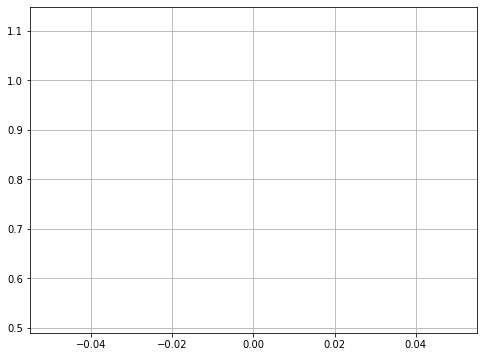

In [33]:
import matplotlib.patches as mpatches

d_loss_history = []
g_loss_history = []

for epoch in range(n_epochs):
    # print(epoch)

    for i, (x_val, y_val) in enumerate(dataloader):
        print(epoch, i)
        
##################### Лейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.DoubleTensor(len(x_val), 1).fill_(1.0).to(device)
        fake = torch.DoubleTensor(len(x_val), 1).fill_(0.0).to(device)
        # print(valid.shape)
        # print(fake)

        # print(x_val)

        real_xy = torch.stack((x_val.to(device), y_val.to(device)), -1)
        # print(real_xy.shape)

        # Генерация шума
        z = torch.DoubleTensor(np.random.uniform(-1, 1, (len(x_val), latent_dim))).to(device)
        # print(z)
        
        # Генерируем данные Генератором на основе шума
        gen_xy = generator(z)
        # print(gen_xy)
######################  Тренировка дискриминатора    ##########################
        
        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_xy)
        
        # print(real_xy.shape)
        # print(real_pred.shape)
        # print(valid.shape)
        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими
        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Подаем сгенерированые данные на Дискриминатор 
        fake_pred = discriminator(gen_xy)
        
        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

######################  Тренировка генератора    ##########################
        
        # генерация шума
        z = torch.DoubleTensor(np.random.uniform(-1, 1, (len(x_val), latent_dim))).to(device)
        
        # Генерируем данные Генератором на основе шума
        gen_xy = generator(z)

        # Подаем сгенерированые данные на Дискриминатор 
        fake_pred = discriminator(gen_xy)
    
        # Тут сравниваем предсказанные значения Дискриминатора (на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(fake_pred, valid)
        
        # Делаем шаг обучения нашего Генератора
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        
######## Отображение процесса обучения и вывод функций потерь ############
        batches_done = epoch * len(dataloader) + i
    
        if batches_done % sample_interval == 0:
            with torch.no_grad():
                plt.clf()

                display.clear_output(wait=False)
                # sample_image(gen_imgs)
                print(f"[Epoch {epoch}/{n_epochs}] [Batch {i}/{len(dataloader)}]", end='|')
                print(f'[D loss: {d_loss.item()}] [G loss: {g_loss.item()}]') 

                # display.display(plt.gcf())
                # plt.show()
                d_loss = d_loss.cpu().detach()
                # print(d_loss)
                g_loss = g_loss.cpu().detach()


                d_loss_history.append(d_loss)
                # print(d_loss_history)
                g_loss_history.append(g_loss)

                
                # plt.plot(np.array(d_loss_history), label='D loss', color = 'red')
                # plt.plot(np.array(g_loss_history), label='G loss', color = 'green')
                # plt.figure(figsize=(8, 6))
                # plt.legend()
                # plt.show()

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(np.array(d_loss_history), label='D loss', color = 'red')
plt.plot(np.array(g_loss_history), label='G loss', color = 'green')



In [21]:
def train(visual1=True, visual2=True):
  
  d_loss_history = []
  g_loss_history = []
  gen_fake = []

  for epoch in range(n_epochs):
      for i, (x_val, y_val) in enumerate(dataloader):
        
##################### Лейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.DoubleTensor(len(x_val), 1).fill_(1.0).to(device)
        fake = torch.DoubleTensor(len(x_val), 1).fill_(0.0).to(device)

        real_xy = torch.stack((x_val.to(device), y_val.to(device)), -1)

        # Генерация шума
        z = torch.DoubleTensor(np.random.uniform(-1, 1, (len(x_val), latent_dim))).to(device)
        # print(z)
        
        # Генерируем данные Генератором на основе шума
        gen_xy = generator(z)
        
######################  Тренировка дискриминатора    ##########################
        
        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_xy)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими
        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Подаем сгенерированые данные на Дискриминатор 
        fake_pred = discriminator(gen_xy)
        
        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

######################  Тренировка генератора    ##########################
        
        # генерация шума
        z = torch.DoubleTensor(np.random.uniform(-1, 1, (len(x_val), latent_dim))).to(device)
        
        # Генерируем данные Генератором на основе шума
        gen_xy = generator(z)

        if epoch == n_epochs-1:
          gen_fake.append(gen_xy.detach())

        # Подаем сгенерированые данные на Дискриминатор 
        fake_pred = discriminator(gen_xy)
    
        # Тут сравниваем предсказанные значения Дискриминатора (на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(fake_pred, valid)
        
        # Делаем шаг обучения нашего Генератора
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        
######## Отображение процесса обучения и вывод функций потерь ############
        batches_done = epoch * len(dataloader) + i
    
        if batches_done % sample_interval == 0:
            with torch.no_grad():
                plt.clf()

                display.clear_output(wait=False)
                # sample_image(gen_imgs)
                print(f"[Epoch {epoch}/{n_epochs}] [Batch {i}/{len(dataloader)}]", end='|')
                print(f'[D loss: {d_loss.item()}] [G loss: {g_loss.item()}]') 

                # display.display(plt.gcf())
                # plt.show()
                d_loss = d_loss.cpu().detach()
                g_loss = g_loss.cpu().detach()


                d_loss_history.append(d_loss)
                # print(d_loss_history)
                g_loss_history.append(g_loss)

  if visual1 == True:
    plt.figure(figsize=(8, 6))
    plt.grid()
    plt.plot(np.array(d_loss_history), label='D loss', color = 'red')
    plt.plot(np.array(g_loss_history), label='G loss', color = 'green')
  
  if visual2 == True:
    x_fake = []
    y_fake = []

    for el in gen_fake:
      for i in el:
        x_fake.append(i[0].item())
        y_fake.append(i[1].item())

    plt.figure(figsize=(10, 8))
    plt.scatter(x_fake,  y_fake)
    plt.plot(x, y, c='r', label='original')
    plt.grid()

[Epoch 12/20] [Batch 4/8]|[D loss: 0.532392510148038] [G loss: 1.2586186633189669]


<Figure size 432x288 with 0 Axes>

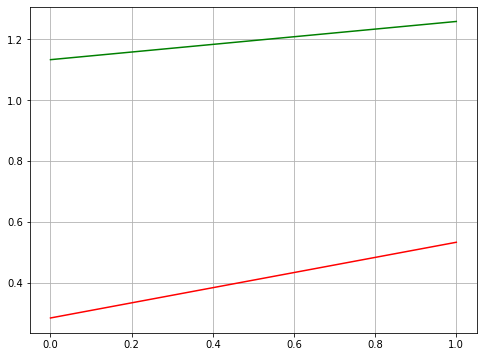

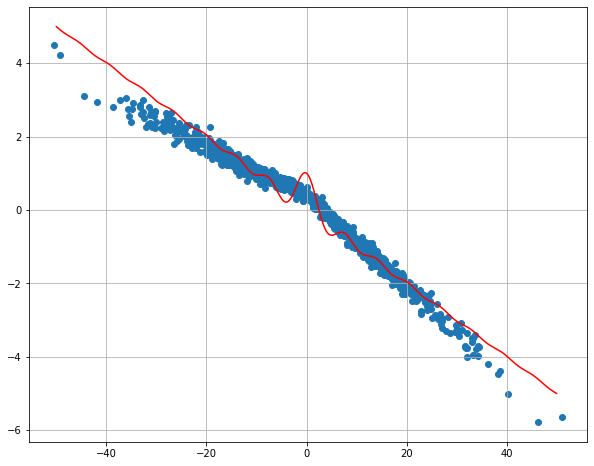

In [35]:
train()

In [23]:
# plt.figure(figsize=(8, 6))
# plt.grid()
# plt.plot(np.array(d_loss_history), label='D loss', color = 'red')
# plt.plot(np.array(g_loss_history), label='G loss', color = 'green')

In [22]:
# x_val

tensor([ 31.8182, -26.7677,  27.7778,  11.6162, -35.8586, -23.7374, -44.9495,
         47.9798,  36.8687,  -9.5960,  42.9293, -45.9596,  -5.5556,  16.6667,
        -43.9394,  38.8889,  29.7980,  46.9697,  -6.5657,  -7.5758,  21.7172,
         10.6061, -32.8283,   2.5253,  41.9192,  15.6566,   6.5657, -27.7778,
         -2.5253,  -4.5455,  30.8081, -29.7980, -30.8081, -34.8485,  13.6364,
          9.5960,  35.8586, -39.8990, -11.6162,  -8.5859, -13.6364,  26.7677,
        -17.6768,  33.8384,  39.8990, -18.6869,  25.7576, -28.7879,  22.7273,
          0.5051, -16.6667,  24.7475,  -0.5051,  23.7374,   1.5152,  19.6970,
         37.8788,  45.9596, -40.9091, -42.9293, -12.6263,  34.8485,  43.9394,
          3.5354, -47.9798, -46.9697,  17.6768, -24.7475, -15.6566,  40.9091,
        -48.9899, -50.0000, -20.7071, -22.7273,  28.7879, -36.8687, -21.7172,
         -1.5152, -38.8889,  12.6263,  20.7071, -31.8182, -14.6465,   4.5455,
         -3.5354,   8.5859, -25.7576, -33.8384,  50.0000, -19.69